<a href="https://colab.research.google.com/github/dukeyico/Analytics/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Replace with the actual name of your uploaded file
df = pd.read_csv("/content/student_habits_performance.csv")

# Preview the data
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [7]:
# Shape (rows, columns)
print("Shape:", df.shape)
print("\n")

# Info about datatypes & nulls
print(df.info())
print("\n")

# Summary statistics (numerical columns)
print(df.describe())

Shape: (1000, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality             

In [8]:
# Missing values
print(df.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [9]:
df["parental_education_level"]=df["parental_education_level"].fillna("Unknown")

# Verify that no missing values remain
print(df["parental_education_level"].isnull().sum())

0


In [10]:
#Checked for number of duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [11]:
# Exploratory Data Analysis
print(df['exam_score'].value_counts())


exam_score
100.0    48
80.9      7
65.6      7
74.0      7
70.7      7
         ..
69.8      1
46.8      1
45.4      1
57.0      1
55.7      1
Name: count, Length: 480, dtype: int64


In [12]:
# Average pass vs fail
print(df.groupby('exam_score')['study_hours_per_day'].mean())

exam_score
18.4     0.600000
23.1     0.900000
26.2     0.000000
26.7     0.000000
26.8     0.650000
           ...   
99.0     5.800000
99.3     5.800000
99.4     5.100000
99.9     6.000000
100.0    6.235417
Name: study_hours_per_day, Length: 480, dtype: float64


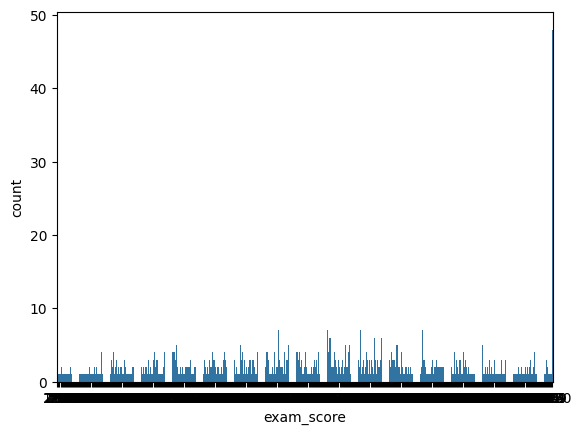

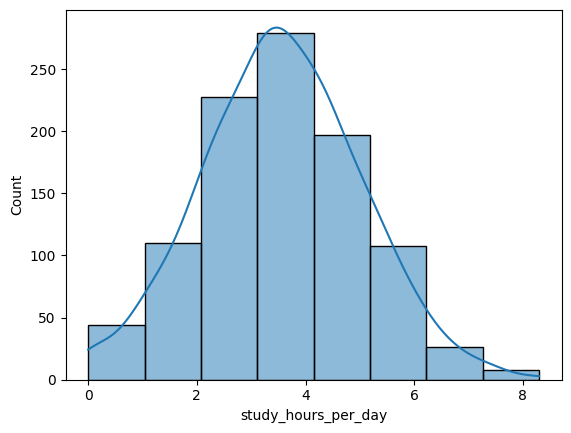

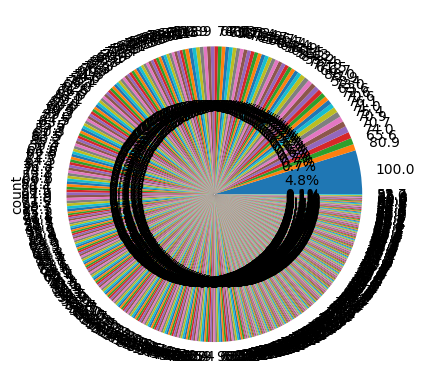

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of pass/fail
sns.countplot(x='exam_score', data=df)
plt.show()

# Histogram of study hours
sns.histplot(df['study_hours_per_day'], bins=8, kde=True)
plt.show()

# Pie chart of pass/fail
df['exam_score'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [16]:
df.to_csv("cleaned_students.csv", index=False)